# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [1]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.19.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- Se presenta un ejemplo de la base de datos

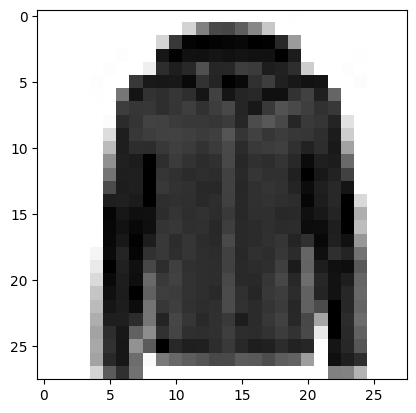

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [5]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

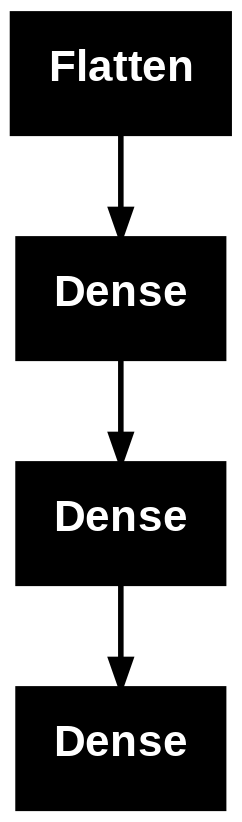

In [6]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

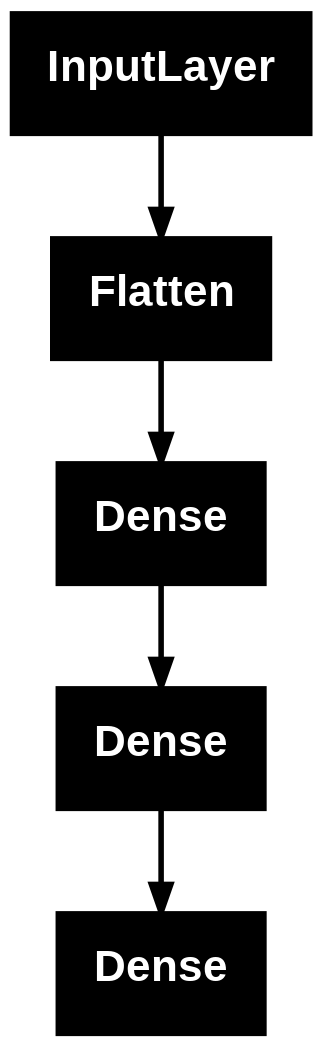

In [7]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


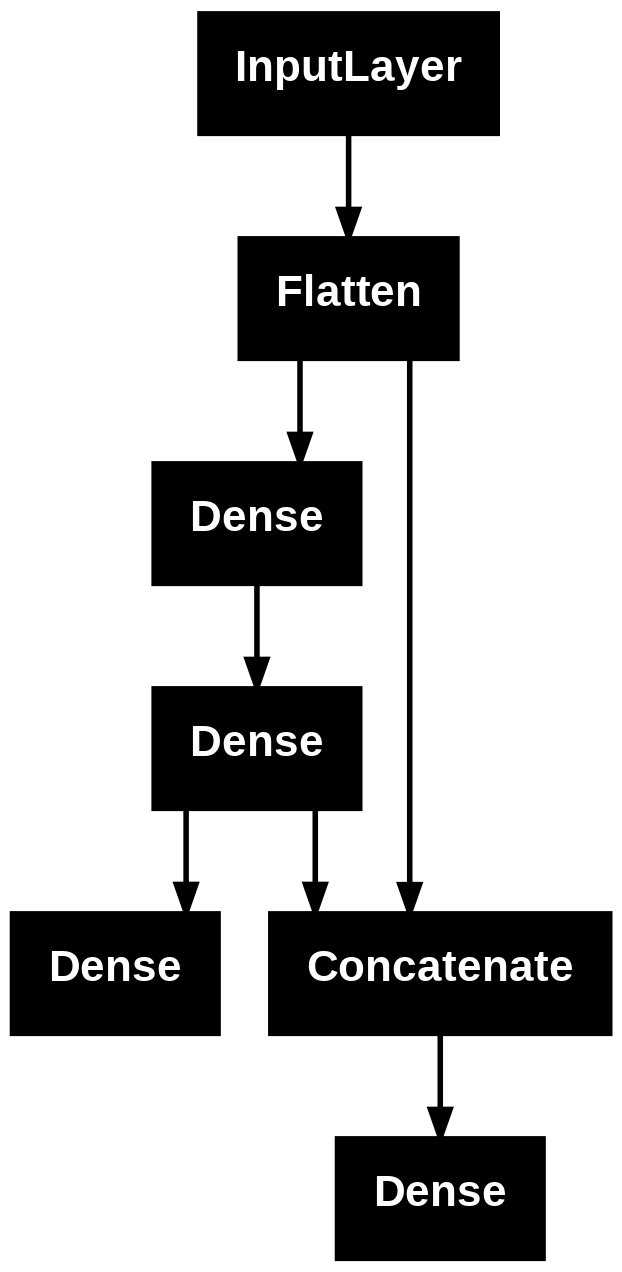

In [8]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [9]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [10]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.4720 - outputA_accuracy: 0.7358 - outputA_loss: 0.7925 - outputB_accuracy: 0.7643 - outputB_loss: 0.6795 - val_loss: 0.8856 - val_outputA_accuracy: 0.8324 - val_outputA_loss: 0.4506 - val_outputB_accuracy: 0.8384 - val_outputB_loss: 0.4343
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8023 - outputA_accuracy: 0.8539 - outputA_loss: 0.4066 - outputB_accuracy: 0.8554 - outputB_loss: 0.3957 - val_loss: 0.7872 - val_outputA_accuracy: 0.8556 - val_outputA_loss: 0.4033 - val_outputB_accuracy: 0.8607 - val_outputB_loss: 0.3827
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7090 - outputA_accuracy: 0.8702 - outputA_loss: 0.3590 - outputB_accuracy: 0.8726 - outputB_loss: 0.3500 - val_loss: 0.7069 - val_outputA_accuracy: 0.8733 - val_outputA_loss: 0.3555 - val_outputB_accuracy: 0.8741 - val_outputB_loss: 0.3507
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6478 - outputA_accuracy: 0.8810 

- Se presentan las curvas de desempeño:

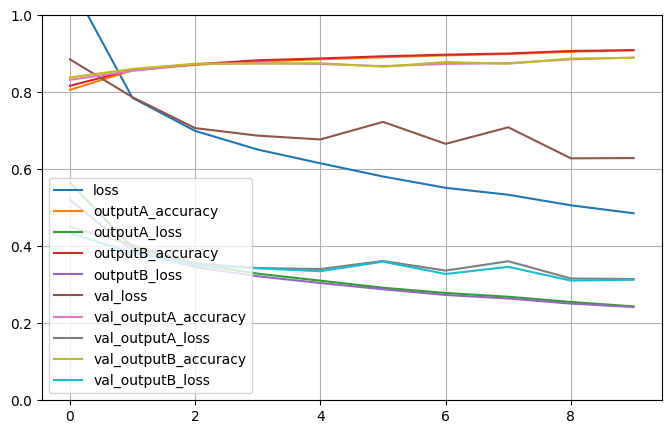

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [12]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
(10000, 10) (10000, 10)


In [13]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [14]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6999 - outputA_accuracy: 0.8815 - outputA_loss: 0.3494 - outputB_accuracy: 0.8778 - outputB_loss: 0.3505
[0.7010648846626282, 0.35051965713500977, 0.35003969073295593, 0.8809000253677368, 0.8776999711990356]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

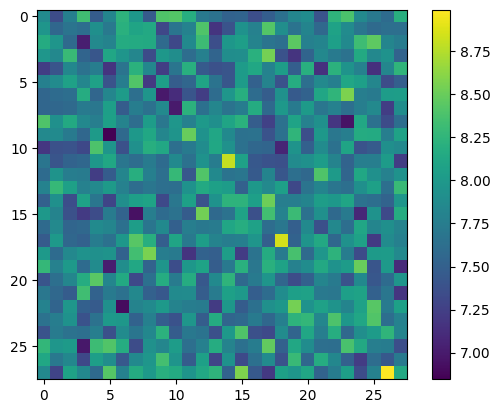

In [15]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [16]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

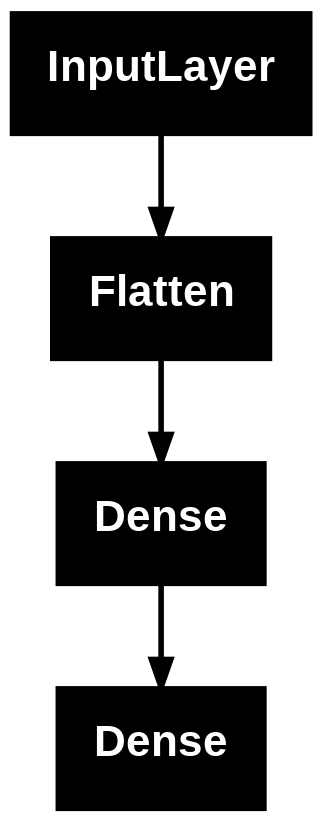

In [17]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [18]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [19]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

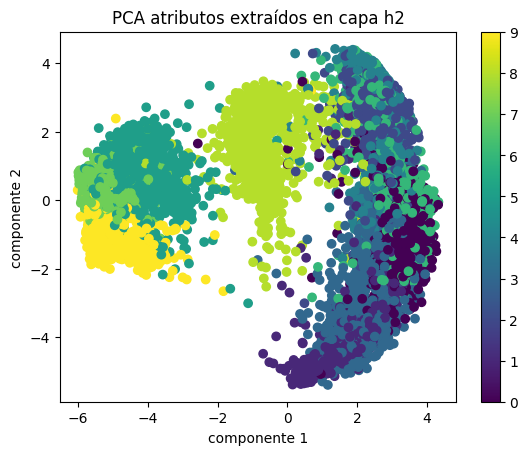

In [20]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [21]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

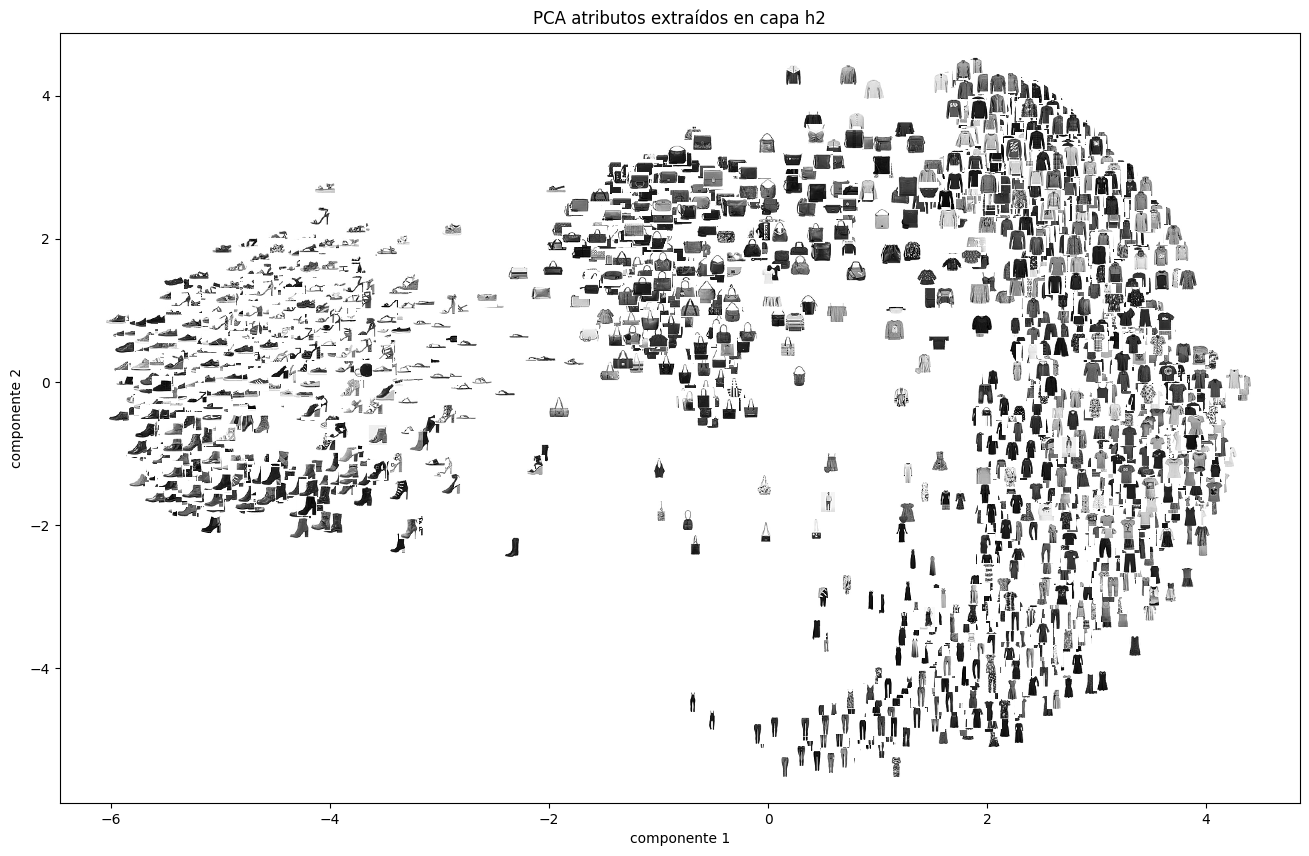

In [22]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [30]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


### Ejercicio final: extensión del modelo funcional

En esta parte del cuaderno empiezo a desarrollar el ejercicio propuesto al final. La idea es aprovechar el modelo funcional con varias entradas para: (i) usar los atributos de la capa de concatenación y proyectarlos con técnicas de reducción de dimensión (PCA y UMAP), y (ii) plantear una nueva arquitectura funcional basada en CNNs con tres entradas (imagen limpia y dos versiones ruidosas) y dos salidas (dígito y par/impar). Todo lo hago sin modificar el código original, sino añadiendo celdas nuevas que extienden el análisis.


In [31]:
# === Preparar entradas (3 imágenes) y salidas (dígito / par-impar) para model_fun2 ===

# 1) Ajustar las entradas: de (N, 28, 28, 1) -> (N, 28, 28),
#    para que coincidan con la forma de entrada definida con Xtrain (28x28)
inputs_train_2D = [x[..., 0] for x in inputs_train]
inputs_valid_2D = [x[..., 0] for x in inputs_valid]
inputs_test_2D  = [x[..., 0] for x in inputs_test]

# 2) Etiquetas de salida:
#    - y_d_* : dígito 0-9  (salida output_d)
#    - y_p_* : 0 si es impar, 1 si es par (salida output_p)
y_d_train = y_train
y_d_valid = y_valid
y_d_test  = y_test

# ya calculaste ytrain_B arriba como (y_train % 2)
y_p_train = ytrain_B
y_p_valid = (y_valid % 2)
y_p_test  = (y_test % 2)

print("Formas de las entradas de entrenamiento (2D):")
for i, arr in enumerate(inputs_train_2D):
    print(f"  Entrada {i+1}: ", arr.shape)

print("Formas de las salidas de entrenamiento:")
print("  y_d_train:", y_d_train.shape, "  y_p_train:", y_p_train.shape)


Formas de las entradas de entrenamiento (2D):
  Entrada 1:  (5000, 28, 28)
  Entrada 2:  (5000, 28, 28)
  Entrada 3:  (5000, 28, 28)
Formas de las salidas de entrenamiento:
  y_d_train: (5000,)   y_p_train: (5000,)


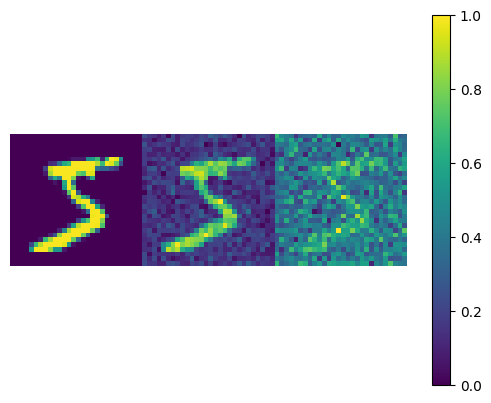

In [32]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [33]:
#veector de salida par o impar
ytrain_B = (y_train % 2)
print(ytrain_B[10:])
print(y_train[10:])

[1 1 1 ... 0 1 0]
[3 5 3 ... 2 1 2]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


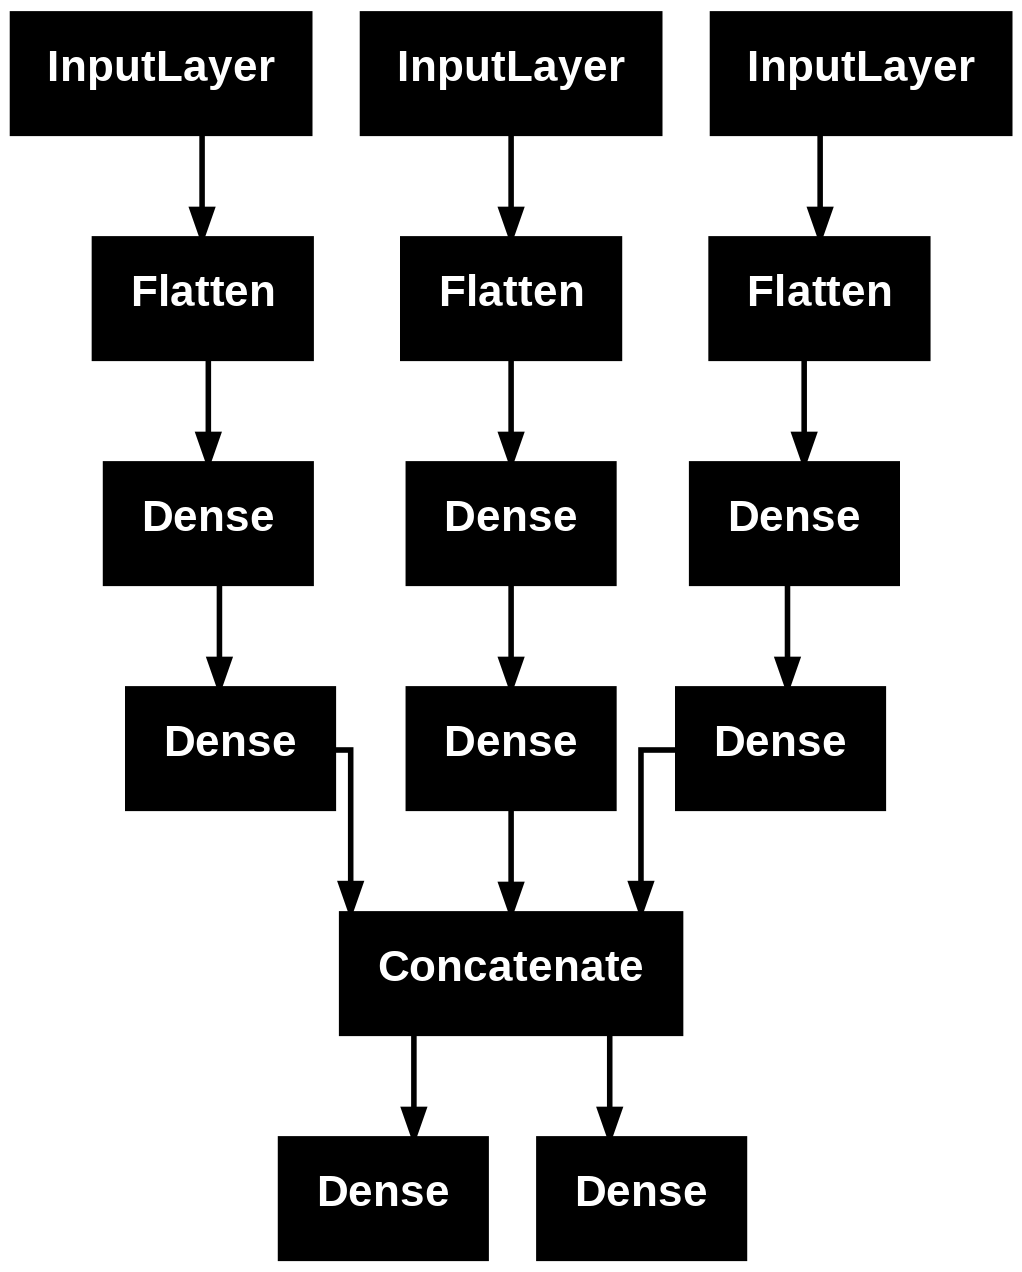

In [34]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [35]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

# === Compilar modelo_fun2 (3 entradas, 2 salidas) ===
model_fun2.compile(
    loss=[  # una función de pérdida por salida, en el mismo orden que outputs=[output_d, output_p]
        "sparse_categorical_crossentropy",  # para el dígito 0-9
        "binary_crossentropy"               # para par (1) / impar (0)
    ],
    optimizer="Adam",
    metrics=["accuracy", "accuracy"]  # precisión para cada salida
)

# === Entrenar el modelo ===
history_fun2 = model_fun2.fit(
    x=inputs_train_2D,
    y=[y_d_train, y_p_train],
    validation_data=(inputs_valid_2D, [y_d_valid, y_p_valid]),
    epochs=10,
    batch_size=64,
    verbose=1
)

# === Evaluación rápida en test ===
score_fun2 = model_fun2.evaluate(
    x=inputs_test_2D,
    y=[y_d_test, y_p_test],
    verbose=0
)
print("Pérdidas y métricas en test (loss_total, loss_dígito, acc_dígito, loss_paridad, acc_paridad):")
print(score_fun2)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 1.9187 - output_d_accuracy: 0.5750 - output_d_loss: 1.3844 - output_p_accuracy: 0.7572 - output_p_loss: 0.5341 - val_loss: 0.7519 - val_output_d_accuracy: 0.8770 - val_output_d_loss: 0.4635 - val_output_p_accuracy: 0.8827 - val_output_p_loss: 0.2880
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.6236 - output_d_accuracy: 0.9001 - output_d_loss: 0.3842 - output_p_accuracy: 0.9133 - output_p_loss: 0.2393 - val_loss: 0.6670 - val_output_d_accuracy: 0.8809 - val_output_d_loss: 0.4024 - val_output_p_accuracy: 0.8920 - val_output_p_loss: 0.2643
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.4683 - output_d_accuracy: 0.9234 - output_d_loss: 0.2817 - output_p_accuracy: 0.9356 - output_p_loss: 0.1865 - val_loss: 0.5028 - val_output_d_accuracy: 0.9050 - val_output_d_loss: 0.3181 - val_output_p_accuracy: 0.9358 - val_output_p_loss: 0.1844
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3585 - outpu

In [36]:
# === Modelo intermedio: de las 3 entradas hasta la capa de concatenación ===

# usamos directamente la variable 'concat' que se definió en la arquitectura de model_fun2
model_concat = tf.keras.Model(
    inputs=model_fun2.inputs,
    outputs=concat,
    name="model_fun2_concat_model"
)

# obtenemos los atributos aprendidos en la capa de concatenación para el conjunto de prueba
z_concat_test = model_concat.predict(inputs_test_2D, batch_size=256, verbose=1)
print("Forma de z_concat_test:", z_concat_test.shape)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Forma de z_concat_test: (10000, 150)


### Proyección PCA 2D de la capa de concatenación

Aquí lo que hago es tomar los atributos que salen de la capa de concatenación del modelo funcional (la capa `concat`) y construir un modelo intermedio que va desde las tres entradas hasta esa capa. Con esos vectores de características aplico PCA a 2 dimensiones para visualizar cómo se organizan las clases en el plano. Primero grafico un `scatter` coloreado por el dígito real, y luego uso la función `plot_mnist_2d` para superponer algunas imágenes sobre las coordenadas de PCA. Con esto puedo ver si la representación aprendida por la red separa de forma razonable los dígitos en el espacio latente.


In [37]:
# === PCA 2D sobre los atributos de la capa de concatenación ===
from sklearn.decomposition import PCA

pca_concat = PCA(n_components=2)
zpca_concat = pca_concat.fit_transform(z_concat_test)

print("Forma de zpca_concat:", zpca_concat.shape)


Forma de zpca_concat: (10000, 2)


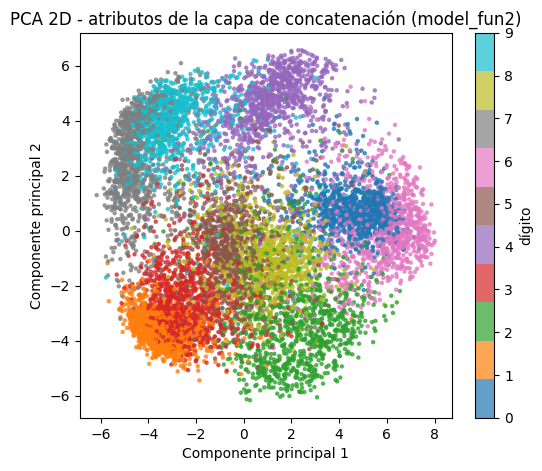

In [38]:
# === Scatter 2D de los atributos proyectados (PCA) ===

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    zpca_concat[:, 0],
    zpca_concat[:, 1],
    c=y_test,      # dígitos 0-9
    s=5,
    alpha=0.7,
    cmap="tab10"
)
plt.colorbar(scatter, label="dígito")
plt.title("PCA 2D - atributos de la capa de concatenación (model_fun2)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()


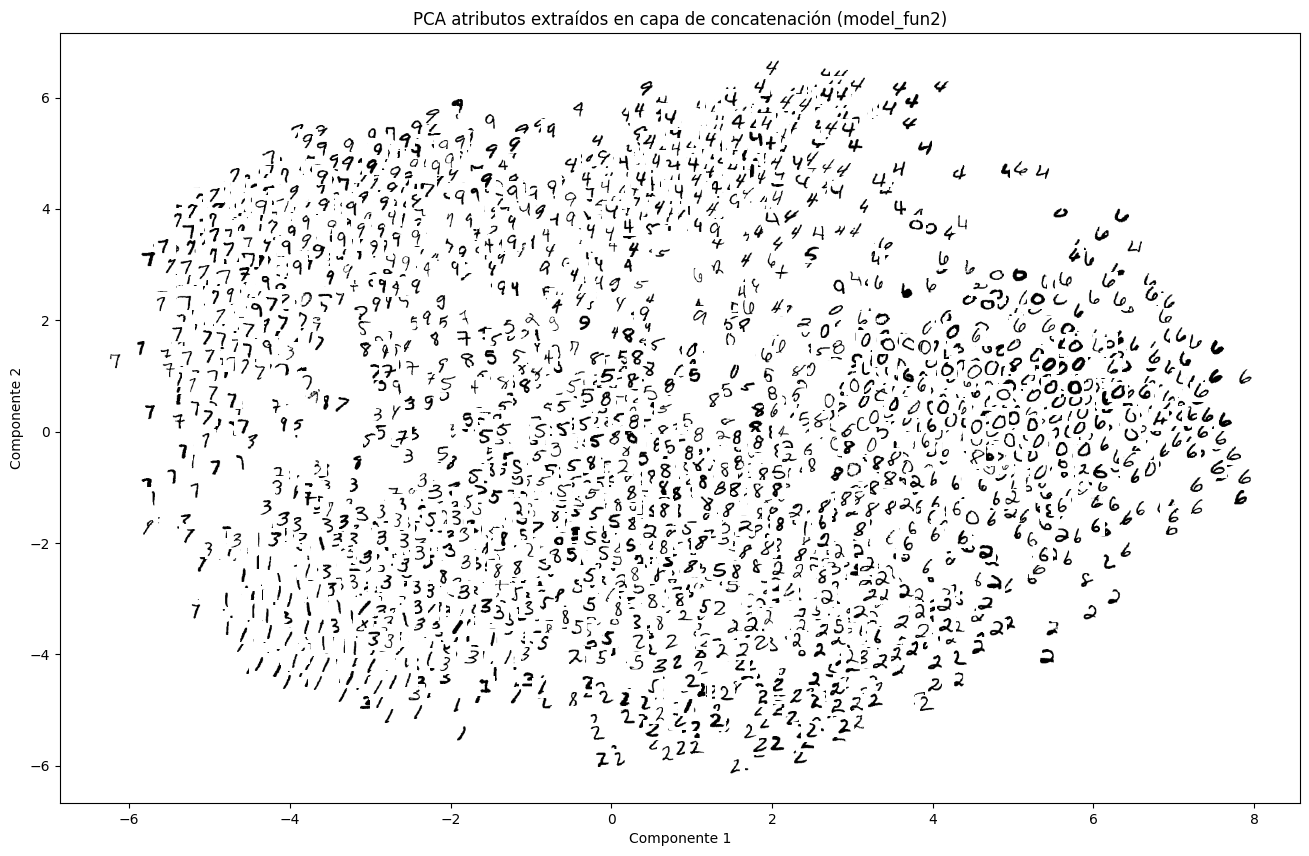

In [39]:
# === Imágenes proyectadas en el espacio PCA 2D (usando plot_mnist_2d) ===

# Preparamos las imágenes 2D (28x28) a partir de X_test (que está en formato (N,28,28,1))
images_test = X_test[..., 0]

Ni = 4000  # número de imágenes a mostrar (puedes bajar si se traba)
ind = np.random.randint(0, y_test.shape[0], Ni)

plot_mnist_2d(
    zpca_concat[ind],      # coordenadas 2D
    y_test[ind],           # etiquetas
    images_test[ind],      # imágenes en 28x28
    img_w=28,
    img_h=28,
    zoom=0.5,
    cmap='binary'
)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA atributos extraídos en capa de concatenación (model_fun2)')
plt.show()


### Proyección UMAP 2D con RAPIDS a partir de la misma capa

En esta sección repito la idea anterior, pero en lugar de PCA utilizo UMAP de RAPIDS sobre los mismos atributos de la capa de concatenación. UMAP suele capturar mejor estructuras no lineales, así que me interesa comparar cómo quedan agrupados los dígitos frente al resultado de PCA. De nuevo, primero muestro un `scatter` 2D coloreado por la etiqueta y luego proyecto algunas imágenes en el plano UMAP usando `plot_mnist_2d`. Esto me permite analizar si la representación aprendida por el modelo facilita la separación de las clases cuando se usa una técnica de reducción de dimensión más potente.


In [40]:
# === UMAP 2D sobre los atributos de la capa de concatenación ===

from cuml.manifold import UMAP

umap_concat = UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

z_umap_concat = umap_concat.fit_transform(z_concat_test)
print("Forma de z_umap_concat:", z_umap_concat.shape)


[2025-11-11 20:17:36.940] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Forma de z_umap_concat: (10000, 2)


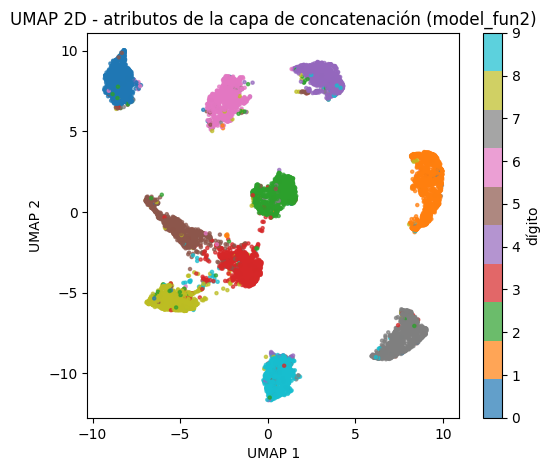

In [41]:
# === Scatter 2D de los atributos proyectados (UMAP) ===

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    z_umap_concat[:, 0],
    z_umap_concat[:, 1],
    c=y_test,      # dígitos 0-9
    s=5,
    alpha=0.7,
    cmap="tab10"
)
plt.colorbar(scatter, label="dígito")
plt.title("UMAP 2D - atributos de la capa de concatenación (model_fun2)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


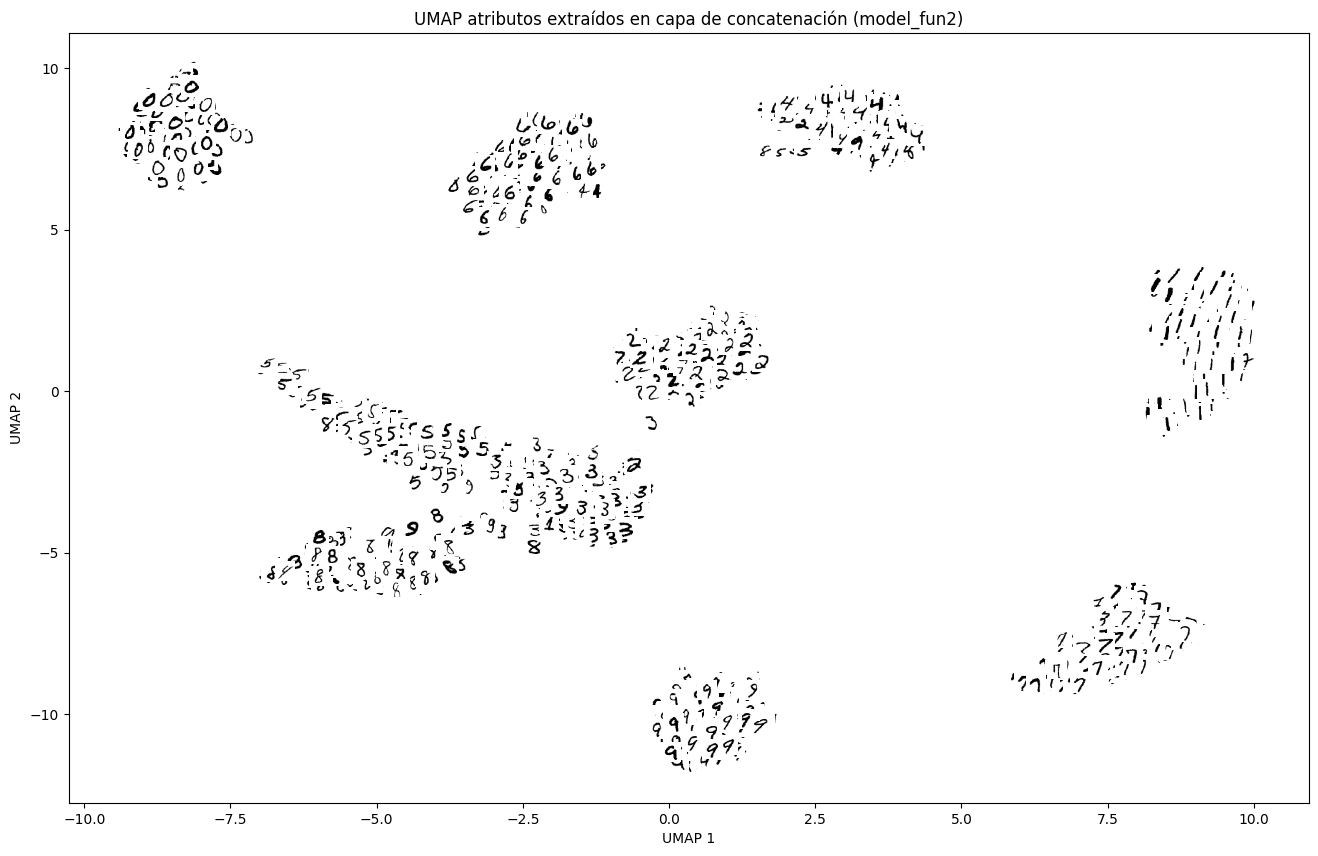

In [42]:
# === Imágenes proyectadas en el espacio UMAP 2D (usando plot_mnist_2d) ===

images_test = X_test[..., 0]  # mismo truco que en el PCA

Ni = 4000  # puedes bajar este número si se tarda mucho
ind = np.random.randint(0, y_test.shape[0], Ni)

plot_mnist_2d(
    z_umap_concat[ind],  # coordenadas 2D UMAP
    y_test[ind],         # etiquetas (0-9)
    images_test[ind],    # imágenes
    img_w=28,
    img_h=28,
    zoom=0.5,
    cmap='binary'
)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP atributos extraídos en capa de concatenación (model_fun2)')
plt.show()


### Nueva arquitectura funcional con CNNs, tres entradas y dos salidas

En esta parte propongo una nueva arquitectura funcional basada en capas convolucionales para el conjunto MNIST. Defino tres ramas convolucionales, una para la imagen limpia y dos para las imágenes con ruido gaussiano de distinta varianza; cada rama tiene sus capas `Conv2D`, `MaxPooling` y `Flatten`. Luego concateno las tres ramas en una capa `concat_cnn` y, a partir de esa representación conjunta, agrego capas densas que alimentan dos salidas: una para clasificar el dígito (0–9) y otra para decidir si el número es par o impar. Entreno este modelo usando las mismas etiquetas que en el caso denso, de modo que la red aprenda una representación robusta que combine información de las tres versiones de la imagen y resuelva simultáneamente las dos tareas.


In [43]:
# === Nueva arquitectura funcional CNN con 3 entradas y 2 salidas ===
from tensorflow.keras import layers

# Entradas: tres imágenes (limpia + dos con ruido), todas de tamaño 28x28x1
input_c1 = layers.Input(shape=(28, 28, 1), name="input_c1")  # imagen limpia
input_c2 = layers.Input(shape=(28, 28, 1), name="input_c2")  # imagen ruido varianza 1
input_c3 = layers.Input(shape=(28, 28, 1), name="input_c3")  # imagen ruido varianza 2

# ---- Rama 1 (para input_c1) ----
x1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_c1)
x1 = layers.MaxPooling2D((2, 2))(x1)
x1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x1 = layers.MaxPooling2D((2, 2))(x1)
x1 = layers.Flatten()(x1)

# ---- Rama 2 (para input_c2) ----
x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_c2)
x2 = layers.MaxPooling2D((2, 2))(x2)
x2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.MaxPooling2D((2, 2))(x2)
x2 = layers.Flatten()(x2)

# ---- Rama 3 (para input_c3) ----
x3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_c3)
x3 = layers.MaxPooling2D((2, 2))(x3)
x3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x3 = layers.MaxPooling2D((2, 2))(x3)
x3 = layers.Flatten()(x3)

# ---- Capa de concatenación de las tres ramas ----
concat_cnn = layers.Concatenate(name="concat_cnn")([x1, x2, x3])

# ---- Capas densas finales compartidas para las dos salidas ----
h = layers.Dense(128, activation='relu')(concat_cnn)
h = layers.Dropout(0.3)(h)

# Salida 1: clasificación del dígito 0-9
output_d_cnn = layers.Dense(10, activation='softmax', name="output_d_cnn")(h)

# Salida 2: clasificación par (1) / impar (0)
output_p_cnn = layers.Dense(1, activation='sigmoid', name="output_p_cnn")(h)

# Definir el modelo funcional completo
model_fun2_cnn = tf.keras.Model(
    inputs=[input_c1, input_c2, input_c3],
    outputs=[output_d_cnn, output_p_cnn],
    name="model_fun2_cnn"
)

model_fun2_cnn.summary()


Model: "model_fun2_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_c1            │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_c2            │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_c3            │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_c1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        320 │ input_c2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        320 │ input_c3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 7, 7, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 3136)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 3136)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,262,219 (4.81 MB)

 Trainable params: 1,262,219 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# === Compilar y entrenar el modelo CNN funcional (model_fun2_cnn) ===

model_fun2_cnn.compile(
    loss=[
        "sparse_categorical_crossentropy",  # salida dígito 0-9
        "binary_crossentropy"               # salida par (1) / impar (0)
    ],
    optimizer="Adam",
    metrics=["accuracy", "accuracy"]
)

history_fun2_cnn = model_fun2_cnn.fit(
    x=inputs_train,                          # lista [X_train_limpio, X_train_ruido1, X_train_ruido2]
    y=[y_d_train, y_p_train],               # dígito y par/impar
    validation_data=(inputs_valid, [y_d_valid, y_p_valid]),
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluación rápida en test
score_fun2_cnn = model_fun2_cnn.evaluate(
    x=inputs_test,
    y=[y_d_test, y_p_test],
    verbose=0
)
print("Pérdidas y métricas en test CNN (loss_total, loss_dígito, acc_dígito, loss_paridad, acc_paridad):")
print(score_fun2_cnn)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - loss: 1.9677 - output_d_cnn_accuracy: 0.5156 - output_d_cnn_loss: 1.4621 - output_p_cnn_accuracy: 0.7353 - output_p_cnn_loss: 0.5056 - val_loss: 0.4815 - val_output_d_cnn_accuracy: 0.9163 - val_output_d_cnn_loss: 0.2782 - val_output_p_cnn_accuracy: 0.9182 - val_output_p_cnn_loss: 0.2030
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.4617 - output_d_cnn_accuracy: 0.9099 - output_d_cnn_loss: 0.2917 - output_p_cnn_accuracy: 0.9319 - output_p_cnn_loss: 0.1701 - val_loss: 0.2878 - val_output_d_cnn_accuracy: 0.9412 - val_output_d_cnn_loss: 0.1863 - val_output_p_cnn_accuracy: 0.9635 - val_output_p_cnn_loss: 0.1013
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3079 - output_d_cnn_accuracy: 0.9408 - output_d_cnn_loss: 0.2021 - output_p_cnn_accuracy: 0.9621 - output_p_cnn_loss: 0.1058 - val_loss: 0.2190 - val_output_d_cnn_accuracy: 0.9565 - val_output_d_cnn_loss: 0.1357 - val_output_p_cnn_accuracy: 0.9701 - val_o

In [45]:
# === Modelo intermedio CNN: de las 3 entradas hasta la capa de concatenación concat_cnn ===

model_concat_cnn = tf.keras.Model(
    inputs=model_fun2_cnn.inputs,
    outputs=concat_cnn,
    name="model_fun2_cnn_concat_model"
)

# obtenemos los atributos aprendidos en la capa de concatenación para el conjunto de prueba
z_concat_cnn_test = model_concat_cnn.predict(inputs_test, batch_size=256, verbose=1)
print("Forma de z_concat_cnn_test:", z_concat_cnn_test.shape)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Forma de z_concat_cnn_test: (10000, 9408)


In [46]:
# === PCA 2D sobre los atributos de la capa concat_cnn ===
from sklearn.decomposition import PCA

pca_concat_cnn = PCA(n_components=2)
zpca_concat_cnn = pca_concat_cnn.fit_transform(z_concat_cnn_test)

print("Forma de zpca_concat_cnn:", zpca_concat_cnn.shape)


Forma de zpca_concat_cnn: (10000, 2)


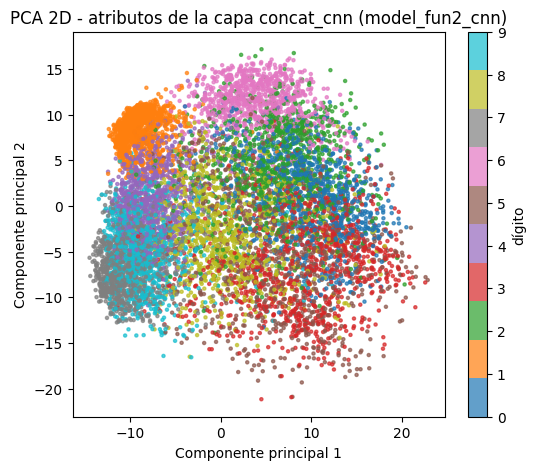

In [47]:
# === Scatter 2D PCA de los atributos de concat_cnn ===

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    zpca_concat_cnn[:, 0],
    zpca_concat_cnn[:, 1],
    c=y_test,      # dígitos 0-9
    s=5,
    alpha=0.7,
    cmap="tab10"
)
plt.colorbar(scatter, label="dígito")
plt.title("PCA 2D - atributos de la capa concat_cnn (model_fun2_cnn)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()


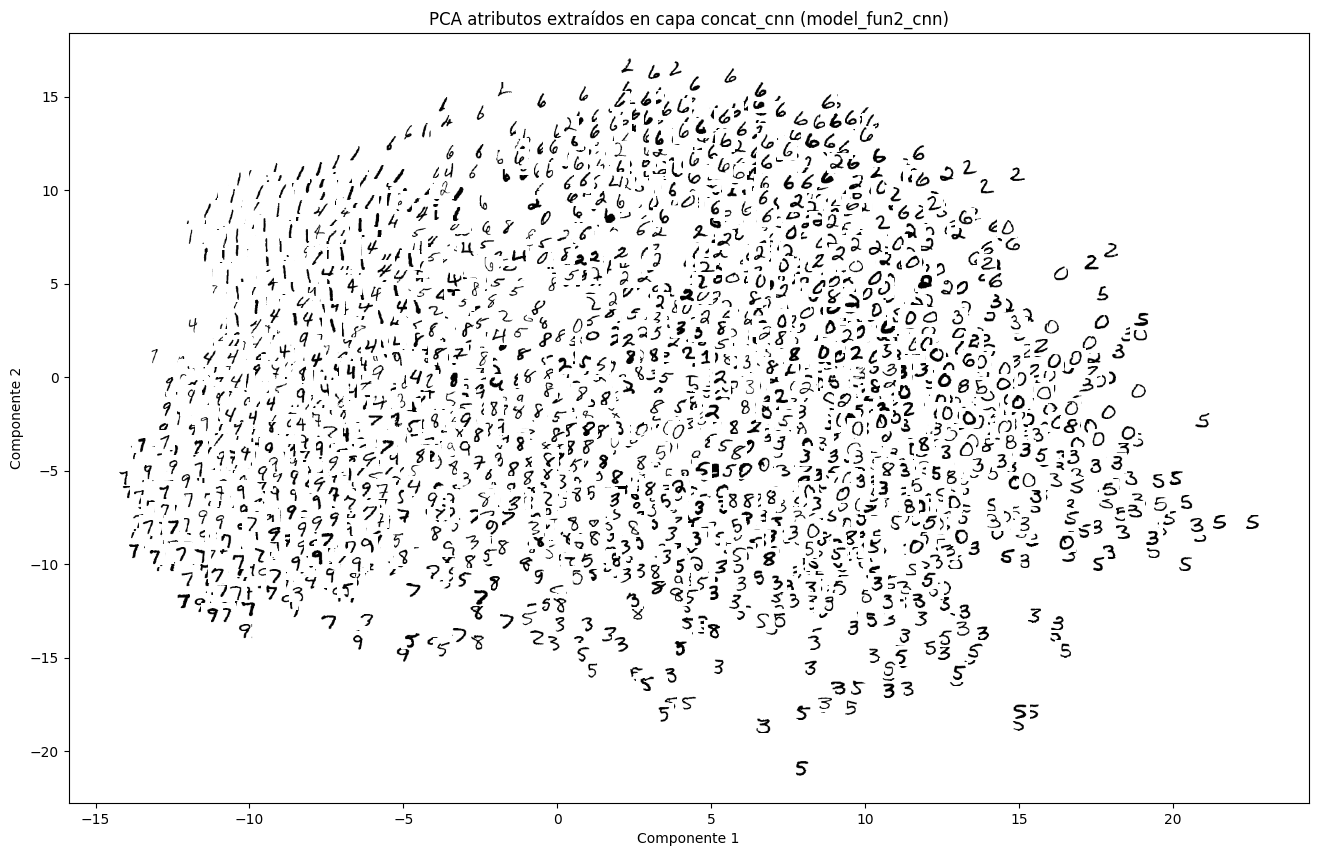

In [48]:
# === Imágenes proyectadas en el espacio PCA 2D (CNN) ===

images_test = X_test[..., 0]  # de (N, 28, 28, 1) -> (N, 28, 28)

Ni = 4000  # baja este número si se tarda mucho
ind = np.random.randint(0, y_test.shape[0], Ni)

plot_mnist_2d(
    zpca_concat_cnn[ind],   # coordenadas PCA 2D
    y_test[ind],            # etiquetas dígito
    images_test[ind],       # imágenes
    img_w=28,
    img_h=28,
    zoom=0.5,
    cmap='binary'
)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA atributos extraídos en capa concat_cnn (model_fun2_cnn)')
plt.show()


In [49]:
# === UMAP 2D sobre los atributos de la capa concat_cnn ===

from cuml.manifold import UMAP

umap_concat_cnn = UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

z_umap_concat_cnn = umap_concat_cnn.fit_transform(z_concat_cnn_test)
print("Forma de z_umap_concat_cnn:", z_umap_concat_cnn.shape)


[2025-11-11 20:24:56.020] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Forma de z_umap_concat_cnn: (10000, 2)


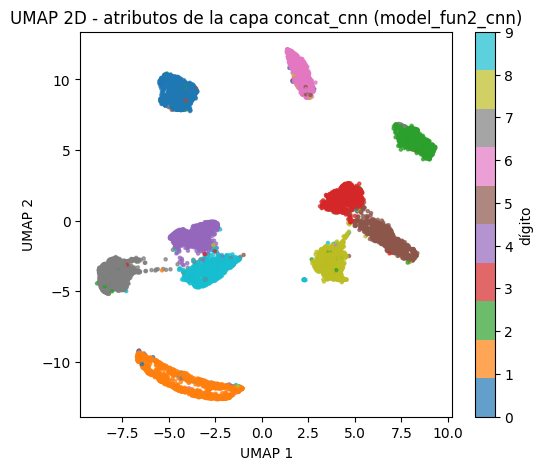

In [50]:
# === Scatter 2D UMAP de los atributos de concat_cnn ===

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    z_umap_concat_cnn[:, 0],
    z_umap_concat_cnn[:, 1],
    c=y_test,
    s=5,
    alpha=0.7,
    cmap="tab10"
)
plt.colorbar(scatter, label="dígito")
plt.title("UMAP 2D - atributos de la capa concat_cnn (model_fun2_cnn)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


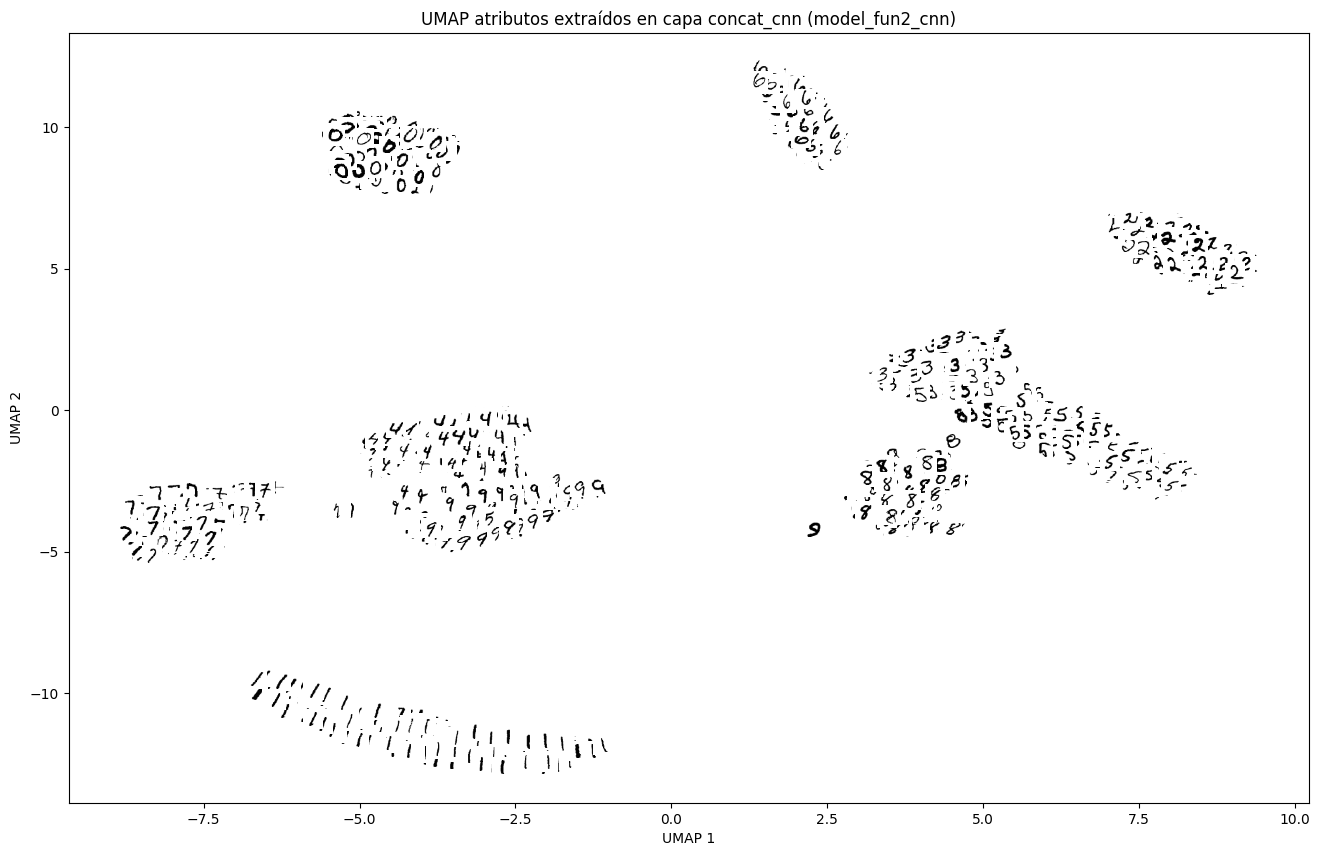

In [51]:
# === Imágenes proyectadas en el espacio UMAP 2D (CNN) ===

Ni = 4000  # otra vez, ajusta si es pesado
ind = np.random.randint(0, y_test.shape[0], Ni)

plot_mnist_2d(
    z_umap_concat_cnn[ind],
    y_test[ind],
    images_test[ind],
    img_w=28,
    img_h=28,
    zoom=0.5,
    cmap='binary'
)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP atributos extraídos en capa concat_cnn (model_fun2_cnn)')
plt.show()
